<a href="https://colab.research.google.com/github/BrandonKTC/Statistic_python/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv("spam.csv")
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


In [4]:
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


In [5]:
# removing outliers
print(len(df))
df = df[df["crl.tot"] < 1500]
df = df[df["bang"] < 5]
df = df[df["money"] < 6]
print(len(df))

4601
4432


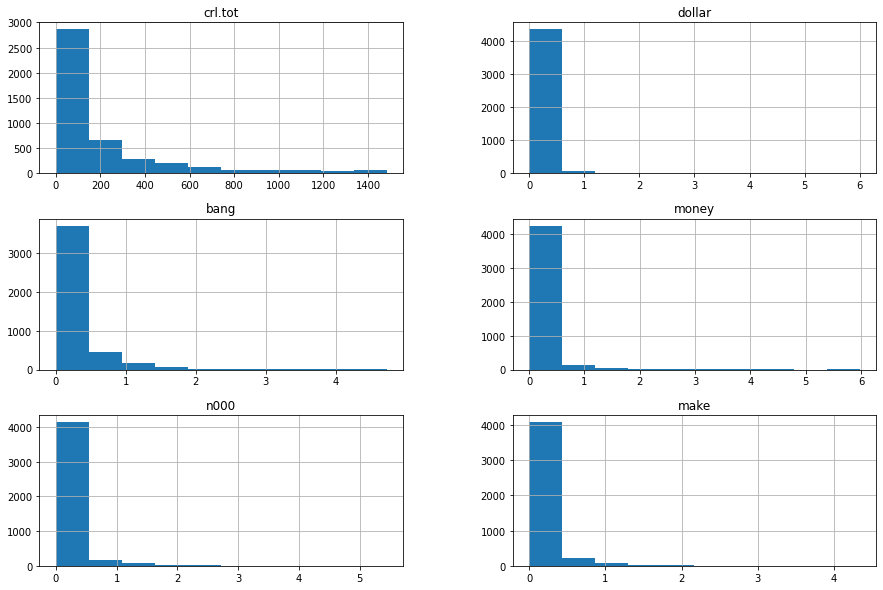

In [6]:
# Histogram
df.hist(figsize=(15,10));

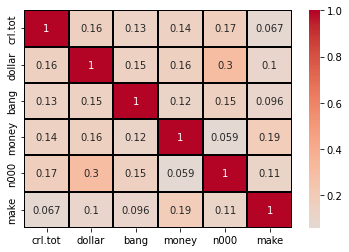

In [7]:
sns.heatmap(df.corr(),
            annot=True,
            center=0,
            linewidth=1,
            linecolor='black',
            cmap="coolwarm")

In [8]:
df["yesno"] = np.where(df["yesno"] == "y", 1, 0)

In [9]:
y = df.yesno
X = df.drop("yesno", axis=1)
X = sm.add_constant(X)
X.head(2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1502)

In [11]:
# Logistic Regression
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Sat, 20 Aug 2022   Pseudo R-squ.:                  0.4210
Time:                        04:29:55   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.

In [12]:
def logistic_reader(coef):
  probability = round((np.exp(coef)-1) * 100, 2)
  print(probability)
  if probability > 0:
    print(f"The likelihood increases by {probability} %")
  elif probability == 0:
    print("No impact")
  else:
    print(f"The likelihood decreases by {probability} %")

In [13]:
preds = model.predict(X_test)
preds = np.where(preds > 0.5, 1, 0)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

[[524  49]
 [102 212]]


In [18]:
# Accuracy
acc = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {round(acc * 100, 1)} %")

# F1-score
f1 = 2 * tp / (2 *tp + fn + fp)
print(f"F1-score: {round(f1 * 100, 1)} %")

# Specificity
spe = tn / (tn + fp)
print(f"Specificity: {round(spe * 100, 1)} %")

# Sensitivity
sen = tp / (tp + fn)
print(f"Sensitivity: {round(sen * 100, 1)} % ")

Accuracy: 83.0 %
F1-score: 73.7 %
Specificity: 91.4 %
Sensitivity: 67.5 % 


In [24]:
print (classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887

